# Step 0: Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso,BayesianRidge, ARDRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv("Boston_data.csv")

# Step 1: Descriptive Statistics

In [3]:
#Preview data
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
# Dataset dimensions (rows, columns)
data.shape

(4600, 18)

In [5]:
# Features (columns) data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# Checking the number of missing values
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
# Statistical summary
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


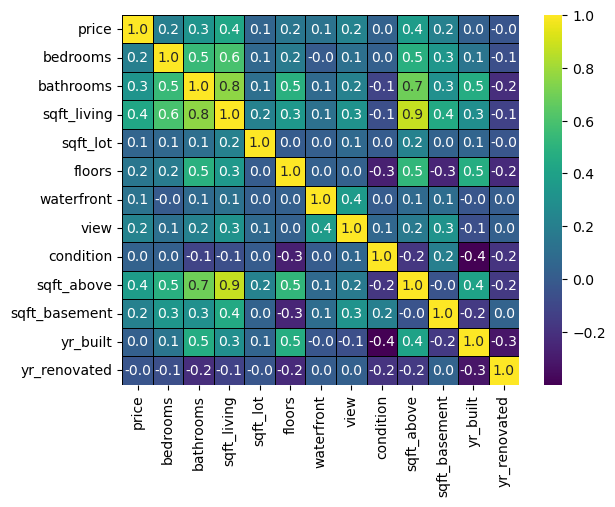

In [8]:
# Heatmap
df=data.select_dtypes("number")
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.1f', cbar=True, linewidths=0.6, linecolor='Black')
plt.show()

From the correlation heatmap, we can see that there is a high correlation between Price and [bedrooms, bathrooms, sqft_living, floors, view, sqft_above, sqft_basement]. We can select these features to accept input from the user and predict the outcome.

In [9]:
# Dropping all the columns having least correlation with the target variable
data = data.drop(['sqft_lot', 'waterfront', 'condition', 'yr_built', 'yr_renovated'], axis=1)

### Checking & removing outliers

#### IQR (Interquartile Range) Method
The Interquartile Range (IQR) method is a robust technique for identifying and removing outliers from a dataset. It involves calculating the IQR for a numerical feature, which is the difference between the third quartile (Q3) and the first quartile (Q1), and then defining a threshold for outliers based on this range. Data points beyond a certain range from the quartiles are considered outliers and can be removed from the dataset.

In [10]:
# Calculate IQR for each numerical feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 3

# Identify potential outliers using IQR
outliers = ((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)

# Print rows with potential outliers
print("Rows with potential outliers:")
data[outliers]

Rows with potential outliers:


,date,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,2.0,4,3370,280,709 W Blaine St,Seattle,WA 98119,USA
32,2014-05-02 00:00:00,650000.0,4.0,2.00,1820,1.5,1,1640,180,7201-7399 55th Ave NE,Seattle,WA 98115,USA
35,2014-05-02 00:00:00,604000.0,3.0,2.50,3240,2.0,2,3240,0,30822 36th Ct SW,Federal Way,WA 98023,USA
38,2014-05-02 00:00:00,403000.0,3.0,2.00,1960,1.0,2,1650,310,17825 4th Ave SW,Normandy Park,WA 98166,USA
39,2014-05-02 00:00:00,750000.0,3.0,2.50,2390,1.0,2,1440,950,3628 59th Ave SW,Seattle,WA 98116,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,2014-07-01 00:00:00,0.0,2.0,2.25,2130,1.5,4,1530,600,3428 60th Ave SW,Seattle,WA 98116,USA
4567,2014-07-02 00:00:00,0.0,4.0,2.50,4080,2.0,2,4080,0,2710 95th Ave NE,Clyde Hill,WA 98004,USA
4570,2014-07-02 00:00:00,318000.0,2.0,1.75,1530,1.0,1,830,700,1922 11th Ave W,Seattle,WA 98119,USA
4575,2014-07-02 00:00:00,0.0,5.0,6.25,8020,2.0,0,8020,0,2 Crescent Key,Bellevue,WA 98006,USA


In [11]:
# Remove outliers from the dataset
data = data[~outliers].reset_index(drop=True)

In [12]:
data

,date,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,1.5,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,1.0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,1.0,0,1000,1000,857 170th Pl NE,Bellevue,WA 98008,USA
3,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,1.0,0,1140,800,9105 170th Ave NE,Redmond,WA 98052,USA
4,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,1.0,0,880,0,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,1.0,0,1510,0,501 N 143rd St,Seattle,WA 98133,USA
4087,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,2.0,0,1460,0,14855 SE 10th Pl,Bellevue,WA 98007,USA
4088,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,2.0,0,3010,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4089,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,1.0,0,1070,1020,5148 S Creston St,Seattle,WA 98178,USA


# Step 2: Feature Engineering

### Encoding the Categorical Data

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['street'] = le.fit_transform(data['street'])
data['city'] = le.fit_transform(data['city'])
data['statezip'] = le.fit_transform(data['statezip'])

In [14]:
data['country'].value_counts()

USA    4091
Name: country, dtype: int64

As the 'country' column has only one unique value, it will have no effect on the target variable. 'date' & 'view' features also have no effect on the target.
Therefore, I will drop these columns.

In [15]:
data.drop(['country', 'date', 'view'], axis=1, inplace=True)

In [16]:
data

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,street,city,statezip
0,313000.000000,3.0,1.50,1340,1.5,1340,0,1392,36,62
1,342000.000000,3.0,2.00,1930,1.0,1930,0,2088,18,26
2,420000.000000,3.0,2.25,2000,1.0,1000,1000,3798,3,7
3,550000.000000,4.0,2.50,1940,1.0,1140,800,3879,31,31
4,490000.000000,2.0,1.00,880,1.0,880,0,3146,35,54
...,...,...,...,...,...,...,...,...,...,...
4086,308166.666667,3.0,1.75,1510,1.0,1510,0,3085,35,62
4087,534333.333333,3.0,2.50,1460,2.0,1460,0,878,3,6
4088,416904.166667,3.0,2.50,3010,2.0,3010,0,3590,32,37
4089,203400.000000,4.0,2.00,2090,1.0,1070,1020,3128,35,71


In [17]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,street,city,statezip
count,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,4.862369e+05,3.353459,2.090870,2017.245417,1.504889,1755.857492,261.387925,2013.077243,25.744072,38.274749
std,2.421750e+05,0.867915,0.711636,805.677924,0.538472,776.856367,405.369701,1161.861473,11.875341,20.532014
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,370.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000e+05,3.000000,1.750000,1411.500000,1.000000,1170.000000,0.000000,1006.500000,17.000000,21.000000
50%,4.400000e+05,3.000000,2.250000,1900.000000,1.500000,1540.000000,0.000000,2011.000000,32.000000,40.000000
75%,6.060000e+05,4.000000,2.500000,2500.000000,2.000000,2215.000000,513.000000,3020.500000,35.000000,56.000000
max,1.635000e+06,7.000000,4.750000,6040.000000,3.500000,5430.000000,2150.000000,4022.000000,43.000000,76.000000


### Selecting features and target

In [18]:
# Splitting the features and target
X = data.drop('price', axis=1)
Y = data['price']

In [19]:
X

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,street,city,statezip
0,3.0,1.50,1340,1.5,1340,0,1392,36,62
1,3.0,2.00,1930,1.0,1930,0,2088,18,26
2,3.0,2.25,2000,1.0,1000,1000,3798,3,7
3,4.0,2.50,1940,1.0,1140,800,3879,31,31
4,2.0,1.00,880,1.0,880,0,3146,35,54
...,...,...,...,...,...,...,...,...,...
4086,3.0,1.75,1510,1.0,1510,0,3085,35,62
4087,3.0,2.50,1460,2.0,1460,0,878,3,6
4088,3.0,2.50,3010,2.0,3010,0,3590,32,37
4089,4.0,2.00,2090,1.0,1070,1020,3128,35,71


In [20]:
Y

0       313000.000000
1       342000.000000
2       420000.000000
3       550000.000000
4       490000.000000
            ...      
4086    308166.666667
4087    534333.333333
4088    416904.166667
4089    203400.000000
4090    220600.000000
Name: price, Length: 4091, dtype: float64

### Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3272, 9)
X_test shape: (819, 9)
Y_train shape: (3272,)
Y_test shape: (819,)


### Feature scaling using Standardization

In [23]:
#  Feature scaling using Standardization
Scaler = StandardScaler()
Scaler.fit(X_train)
Scaler.fit(X_test)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

# Step 4: Data Modelling

### 1. Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

### 2. Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


rf_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model_rf = RandomizedSearchCV(estimator = rf, param_distributions = rf_param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


### 3. Bayesian Ridge Regression

In [26]:
br = BayesianRidge(n_iter=400)
br.fit(X_train, Y_train)
y_pred_br = br.predict(X_test)

### 4. Gradient Boosting Regression

In [27]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, Y_train)
y_pred_gbr = gbr.predict(X_test)

### 5. XGBoost

In [28]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()

xgb_param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 6, 7, 9],
    'n_estimators': [100, 500, 1000]
}

model_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_param, cv=5, scoring='r2')

model_xgb.fit(X_train, Y_train)
y_pred_xgb = model_xgb.predict(X_test)


# Step 5: Model Evaluation

In [29]:
# Evaluating using r2_score metric
from sklearn.metrics import r2_score
r2score_lr = r2_score(Y_test, y_pred_lr)
r2score_rf = r2_score(Y_test, y_pred_rf)
r2score_br = r2_score(Y_test, y_pred_br)
r2score_gbr = r2_score(Y_test, y_pred_gbr)
r2score_xgb = r2_score(Y_test, y_pred_xgb)

In [30]:
# R2 Score on test set
print(f"Linear Regression: {r2score_lr}")
print(f"Random Forest: {r2score_rf}")
print(f"Bayesian Ridge Regression: {r2score_br}")
print(f"Gradient Boosting Regression: {r2score_gbr}")
print(f"XGBoost Regression: {r2score_xgb}")

Linear Regression: 0.434320149903375
Random Forest: 0.7057570381211367
Bayesian Ridge Regression: 0.4344359681416857
Gradient Boosting Regression: 0.6897237589940164
XGBoost Regression: 0.7289489985769331


In [31]:
# import pickle

In [32]:
# pickle.dump(model_rf, open('HousePricePrediction.pkl', 'wb'))